## Genetic Algorithm Overview
Flowchart of the genetic algorithm is shown below. Each step involved in GA has some variations.
<img src="GAF.png" alt="GAF" width="300"/>

## Practical
The y=target is to maximize this equation ASAP:
<br>
y = w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> + w<sub>4</sub>x<sub>4</sub> + w<sub>5</sub>x<sub>5</sub> + w<sub>6</sub>x<sub>6</sub>
<br>
What are the best values for 6 weights w<sub>1</sub> to w<sub>6</sub>?
<br>
We are going to use the genetic algorithm for the best possible values after a number of generations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GA

In [2]:
# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

In [3]:
# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

# Genetic algorithm parameters - mating pool size, population size
sol_per_pop = 8
num_parents_mating = 4

In [4]:
# Defining the population size.
# The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
pop_size = (sol_per_pop,num_weights)
# Creating the initial population.
new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

[[ 2.57132506 -0.74015491 -0.29670949  3.56589183  3.48805313  0.64268932]
 [ 2.74206866 -2.64075024  1.62764677  0.26743358  2.96137387 -1.04538023]
 [ 3.95718451  3.02557549  0.78634382  2.4579619  -0.67139922  1.67843926]
 [-0.03399882 -3.10422363  2.16945433 -0.4362672   1.39358128 -3.58466357]
 [ 1.01870562  1.34710105  1.05271727 -2.63351139  1.0614375  -0.4182222 ]
 [-1.89638665  0.80873215 -1.05217771 -2.04400288 -1.2897098   2.65801682]
 [-2.27479167 -2.77106485 -3.71120897  1.33064791 -1.11656782 -3.33708116]
 [ 3.1685871  -2.83062227 -3.4131652  -2.5161035   1.99257492  0.31209599]]


<img src="crossover and mutation.png" alt="GAF" height="300"/>

In [5]:
best_outputs = []
num_generations = 1000
for generation in range(num_generations):
    print("\nGeneration #", generation+1)
    
    # Measuring the fitness of each chromosome in the population.
    fitness = GA.cal_pop_fitness(equation_inputs, new_population)
    print("\nFitness values: \n", fitness)
    
    # Selecting the best parents in the population for mating.
    parents = GA.select_mating_pool(new_population, fitness, num_parents_mating)
    print("\nSelected parents: \n", parents)
    
    # Generating next generation using crossover.
    offspring_crossover = GA.crossover(parents, offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("\nCrossover result: \n", offspring_crossover)
    
    # Adding some variations to the offspring using mutation.
    offspring_mutation = GA.mutation(offspring_crossover)
    print("\nMutation result: \n", offspring_mutation)
    
    best_outputs.append(np.max(np.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("\nBest result after generation #", generation+1, ": ", np.max(np.sum(new_population*equation_inputs, axis=1)))
    print("\n")

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation


Generation # 1

Fitness values: 
 [-12.83263819  -4.37811874  24.31632677  13.00273081 -17.8125943
 -21.41151845  18.07349861 -29.57617805]

Selected parents: 
 [[ 3.95718451  3.02557549  0.78634382  2.4579619  -0.67139922  1.67843926]
 [-2.27479167 -2.77106485 -3.71120897  1.33064791 -1.11656782 -3.33708116]
 [-0.03399882 -3.10422363  2.16945433 -0.4362672   1.39358128 -3.58466357]
 [ 2.74206866 -2.64075024  1.62764677  0.26743358  2.96137387 -1.04538023]]

Crossover result: 
 [[ 3.95718451  3.02557549  0.78634382  1.33064791 -1.11656782 -3.33708116]
 [-2.27479167 -2.77106485 -3.71120897 -0.4362672   1.39358128 -3.58466357]
 [-0.03399882 -3.10422363  2.16945433  0.26743358  2.96137387 -1.04538023]
 [ 2.74206866 -2.64075024  1.62764677  2.4579619  -0.67139922  1.67843926]]

Mutation result: 
 [[ 3.95718451  3.02557549  0.78634382  1.33064791 -1.01723215 -3.33708116]
 [-2.27479167 -2.77106485 -3.71120897 -0.4362672   1.55054605 -3.58466357]
 [-0.03399882 -3.10422363  2.16945433  0.2674

Generation # 10

Fitness values: 
 [85.25432797 80.80499214 79.37424577 76.17807527 80.75912648 89.14012964
 81.82355466 85.80119182]

Selected parents: 
 [[ 2.74206866 -2.64075024  1.62764677  1.33064791 -4.07782453 -3.33708116]
 [ 2.74206866 -2.64075024  1.62764677  1.33064791 -3.77428473 -3.33708116]
 [ 2.74206866 -2.64075024  1.62764677  1.33064791 -3.72456983 -3.33708116]
 [ 2.74206866 -2.64075024  1.62764677  1.33064791 -3.41268135 -3.33708116]]

Crossover result: 
 [[ 2.74206866 -2.64075024  1.62764677  1.33064791 -3.77428473 -3.33708116]
 [ 2.74206866 -2.64075024  1.62764677  1.33064791 -3.72456983 -3.33708116]
 [ 2.74206866 -2.64075024  1.62764677  1.33064791 -3.41268135 -3.33708116]
 [ 2.74206866 -2.64075024  1.62764677  1.33064791 -4.07782453 -3.33708116]]

Mutation result: 
 [[ 2.74206866 -2.64075024  1.62764677  1.33064791 -3.86888332 -3.33708116]
 [ 2.74206866 -2.64075024  1.62764677  1.33064791 -2.82191769 -3.33708116]
 [ 2.74206866 -2.64075024  1.62764677  1.33064791 -3

Generation # 65

Fitness values: 
 [318.72556973 313.19542936 310.512499   308.02386451 303.77630667
 311.13108114 318.09505716 311.86927252]

Selected parents: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -24.94922817
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -24.89190885
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -24.44648814
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -24.32592843
   -3.33708116]]

Crossover result: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -24.89190885
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -24.44648814
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -24.32592843
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -24.94922817
   -3.33708116]]

Mutation result: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -25.13787031
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33

Best result after generation # 107 :  503.33505712042137



Generation # 108

Fitness values: 
 [503.33505712 498.52817771 496.87277821 495.6043522  487.57370802
 500.41216574 496.9388783  501.52106735]

Selected parents: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -41.73190885
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -41.56700069
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -41.46619145
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -41.29491981
   -3.33708116]]

Crossover result: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -41.56700069
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -41.46619145
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -41.29491981
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -41.73190885
   -3.33708116]]

Mutation result: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -41.51384258
  


Crossover result: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -53.93545616
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -53.82707412
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -53.38054973
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -53.95918956
   -3.33708116]]

Mutation result: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -54.37753641
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -54.55885189
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -52.84342849
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -54.70176242
   -3.33708116]]

Best result after generation # 138 :  637.8351449839046



Generation # 139

Fitness values: 
 [637.83514498 637.57407759 636.38187518 631.47010682 642.43696035
 644.43143061 625.56177317 646.0034464 ]

Selected parents: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -54.70176242
  

   -3.33708116]]

Crossover result: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -75.93486003
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -75.772804
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -75.68071516
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -76.02564617
   -3.33708116]]

Mutation result: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -75.59974416
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -76.50593418
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -75.96507778
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -75.07222272
   -3.33708116]]

Best result after generation # 190 :  880.5661676628297



Generation # 191

Fitness values: 
 [880.56616766 879.56752013 877.78490384 876.77192657 875.88124553
 885.84933574 879.89991539 870.07850978]

Selected parents: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 


Generation # 222

Fitness values: 
 [1004.23418973  995.40871097  992.1842972   990.2794769  1004.86363034
  987.08540665 1000.69567743 1012.14787182]

Selected parents: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -87.98761927
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -87.3254155
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -87.26819363
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -86.94651069
   -3.33708116]]

Crossover result: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -87.3254155
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -87.26819363
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -86.94651069
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -87.98761927
   -3.33708116]]

Mutation result: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -87.51571455
   -3.33708116]
 [  2.74206866  -2.64075024   1.6276467

   -3.33708116]]

Mutation result: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -97.34384646
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -97.45699933
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -97.83367981
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -97.25516226
   -3.33708116]]

Best result after generation # 249 :  1118.2100339103367



Generation # 250

Fitness values: 
 [1118.21003391 1116.49915875 1115.06872334 1109.91656088 1115.06637091
 1116.31105239 1120.45453777 1114.09084473]

Selected parents: 
 [[  2.74206866  -2.64075024   1.62764677   1.33064791 -97.83367981
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -97.62963401
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -97.4740999
   -3.33708116]
 [  2.74206866  -2.64075024   1.62764677   1.33064791 -97.45699933
   -3.33708116]]

Crossover result: 
 [[  2.74206866  -2.64075024   1.62764677   1

 1326.74099    1315.31848928 1325.64753613]

Selected parents: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -116.58699365
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -116.48758876
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -115.75516236
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -115.71200257
    -3.33708116]]

Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -116.48758876
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -115.75516236
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -115.71200257
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -116.58699365
    -3.33708116]]

Mutation result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -116.41261257
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -116.2072193
    -3.33708116]
 [ 

 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -138.00968053
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -137.48123125
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -137.44629719
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -137.15928997
    -3.33708116]]

Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -137.48123125
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -137.44629719
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -137.15928997
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -138.00968053
    -3.33708116]]

Mutation result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -136.5217464
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -137.43410161
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -136.7235

 [1729.5555951  1726.21830984 1722.70562577 1722.55907464 1718.67523411
 1726.56613568 1730.76263379 1735.43398682]

Selected parents: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -153.74090245
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -153.316234
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -153.20650321
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -152.93473417
    -3.33708116]]

Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -153.316234
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -153.20650321
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -152.93473417
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -153.74090245
    -3.33708116]]

Mutation result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -153.7013085
    -3.33708116]
 [   2.74206866   -2.640

 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -168.79322994
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -168.41638921
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -168.22079327
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -168.85901074
    -3.33708116]]

Mutation result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -167.98808807
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -167.78938281
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -167.85271729
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -168.08999939
    -3.33708116]]

Best result after generation # 431 :  1901.7331779445165



Generation # 432

Fitness values: 
 [1901.73317794 1901.00958911 1896.86434116 1894.71278582 1892.15302856
 1889.96727074 1890.66394999 1893.27405311]

Selected parents: 
 [[   2.74206866   -2.64075024   

Best result after generation # 464 :  2053.2294018893035



Generation # 465

Fitness values: 
 [2053.22940189 2046.500721   2045.87821382 2041.87477007 2040.33783128
 2049.92388192 2039.68813167 2044.05720643]

Selected parents: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -182.63139473
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -182.33089292
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -182.01969647
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -181.96310491
    -3.33708116]]

Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -182.33089292
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -182.01969647
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -181.96310491
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -182.63139473
    -3.33708116]]

Mutation result: 
 [[   2.742068

Best result after generation # 510 :  2221.1310402157164



Generation # 511

Fitness values: 
 [2221.13104022 2218.51136355 2215.73960678 2215.07087623 2219.43023618
 2221.42627812 2205.52736028 2212.3739486 ]

Selected parents: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -197.92201985
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -197.89518004
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -197.74056149
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -197.65702761
    -3.33708116]]

Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -197.89518004
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -197.74056149
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -197.65702761
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -197.92201985
    -3.33708116]]

Mutation result: 
 [[   2.742068

    -3.33708116]]

Best result after generation # 554 :  2434.707518366243



Generation # 555

Fitness values: 
 [2434.70751837 2434.60166172 2431.51769099 2429.50376393 2442.62728329
 2427.93550578 2422.98800191 2438.97953942]

Selected parents: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -218.03120213
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -217.69958906
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -217.3112235
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -217.30160017
    -3.33708116]]

Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -217.69958906
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -217.3112235
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -217.30160017
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -218.03120213
    -3.33708116]]

Mutation result:


Generation # 598

Fitness values: 
 [2611.24896087 2605.12326414 2604.64313195 2602.41279443 2597.64738732
 2597.33645317 2604.39616975 2610.10223057]

Selected parents: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -233.36044555
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -233.25619734
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -232.80356403
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -232.75991565
    -3.33708116]]

Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -233.25619734
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -232.80356403
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -232.75991565
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -233.36044555
    -3.33708116]]

Mutation result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -232.99533655


 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -246.73234863
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -246.60372373
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -245.93509137
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -245.89345733
    -3.33708116]]

Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -246.60372373
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -245.93509137
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -245.89345733
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -246.73234863
    -3.33708116]]

Mutation result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -247.01513729
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -246.78907526
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -245.312


Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -264.34903353
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -264.26900005
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -264.12134477
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -265.14406814
    -3.33708116]]

Mutation result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -264.46886017
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -264.03287247
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -263.59992165
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -265.56291043
    -3.33708116]]

Best result after generation # 677 :  2960.868809392044



Generation # 678

Fitness values: 
 [2960.86880939 2952.12342864 2951.24306034 2949.61885226 2953.44152165
 2948.64565696 2943.88319799 2965.47607453]

Selected parents: 
 [[   2.742068

    -3.33708116]]

Best result after generation # 704 :  3092.8937153024062



Generation # 705

Fitness values: 
 [3092.8937153  3085.54312422 3084.76023622 3082.94409389 3090.54339177
 3074.57598302 3082.80132683 3086.31922332]

Selected parents: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -277.14633232
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -276.93266654
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -276.54865123
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -276.47809676
    -3.33708116]]

Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -276.93266654
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -276.54865123
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -276.47809676
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -277.14633232
    -3.33708116]]

Mutation resu

 3232.92570188 3235.08222427 3234.59819738]

Selected parents: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -291.06428007
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -290.47494479
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -290.36886599
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -290.34512145
    -3.33708116]]

Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -290.47494479
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -290.36886599
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -290.34512145
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -291.06428007
    -3.33708116]]

Mutation result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -290.31777373
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -291.079693
    -3.33708116]
 [  

    -3.33708116]]

Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -304.73639116
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -304.58785485
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -304.42138237
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -305.17620537
    -3.33708116]]

Mutation result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -304.77039778
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -304.21427372
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -304.14077898
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -305.83624431
    -3.33708116]]

Best result after generation # 790 :  3401.222318827257



Generation # 791

Fitness values: 
 [3401.22231883 3396.38436256 3394.75046316 3392.91926592 3396.75843541
 3390.64107074 3389.83262854 3408.48274721]

Selected parent

 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -317.8041802
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -317.6832873
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -317.62548537
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -317.39603703
    -3.33708116]]

Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -317.6832873
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -317.62548537
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -317.39603703
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -317.8041802
    -3.33708116]]

Mutation result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -317.48023216
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -317.24771453
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -317.1999423

    -3.33708116]]

Mutation result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -328.65702565
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -327.16661796
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -327.2852079
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -328.27719114
    -3.33708116]]

Best result after generation # 848 :  3648.9536375960843



Generation # 849

Fitness values: 
 [3648.9536376  3648.74033742 3641.8500719  3641.33518634 3659.51134197
 3643.11685736 3644.42134672 3655.33316234]

Selected parents: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -328.65702565
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -328.27719114
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -327.69723434
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -327.67784342
    -3.33708116]]

Crossover resul

    -3.33708116]]

Mutation result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -346.96327556
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -346.51407232
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -346.66344395
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -346.96961213
    -3.33708116]]

Best result after generation # 896 :  3854.9865057110524



Generation # 897

Fitness values: 
 [3854.98650571 3851.71791463 3847.78156472 3846.79575617 3860.88009094
 3855.93885534 3857.58194321 3860.94979328]

Selected parents: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -346.96961213
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -346.96327556
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -346.66344395
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -346.51407232
    -3.33708116]]

Crossover resu

Generation # 931

Fitness values: 
 [4001.69542042 3994.97680494 3994.51739513 3993.75571207 3999.56632352
 4004.24149078 4003.56704963 3996.33429507]

Selected parents: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -359.99613009
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -359.93481726
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -359.76466915
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -359.57111488
    -3.33708116]]

Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -359.93481726
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -359.76466915
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -359.57111488
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -359.99613009
    -3.33708116]]

Mutation result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -360.6756041
  

    -3.33708116]]

Best result after generation # 982 :  4193.1776400304325



Generation # 983

Fitness values: 
 [4193.17764003 4192.89784469 4189.16825499 4186.4037522  4199.87853826
 4185.06551127 4176.32518685 4202.77438336]

Selected parents: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -378.04457487
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -377.78131622
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -377.17214366
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -377.14670772
    -3.33708116]]

Crossover result: 
 [[   2.74206866   -2.64075024    1.62764677    1.33064791 -377.78131622
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -377.17214366
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -377.14670772
    -3.33708116]
 [   2.74206866   -2.64075024    1.62764677    1.33064791 -378.04457487
    -3.33708116]]

Mutation resu

In [6]:
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = GA.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution: ", new_population[best_match_idx, :])
print("Best solution fitness: ", fitness[best_match_idx])

Best solution:  [[[   2.74206866   -2.64075024    1.62764677    1.33064791 -384.76251868
     -3.33708116]]]
Best solution fitness:  [4276.67176526]


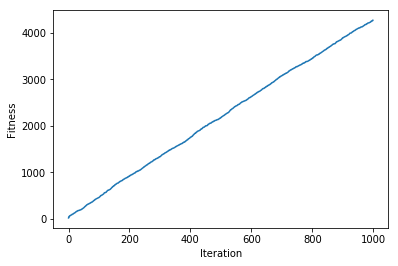

In [7]:
plt.plot(best_outputs)
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.show()